In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

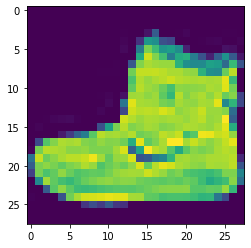

In [4]:
plt.imshow(x_train[0])

In [5]:
x_train.max()

255

In [6]:
x_test = x_test/255

In [7]:
x_train = x_train/255

In [8]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test = x_test.reshape(10000,28,28,1)

In [20]:
x_train = x_train.reshape(60000,28,28,1)

In [12]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train)

In [15]:
y_cat_test = to_categorical(y_test)

In [16]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential

In [17]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',metrics=['accuracy'],loss='categorical_crossentropy')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x=x_train,y=y_cat_train,validation_data=(x_test,y_cat_test),epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 204us/sample - loss: 0.4000 - accuracy: 0.8578 - val_loss: 0.3553 - val_accuracy: 0.8735
Epoch 2/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2779 - accuracy: 0.8992 - val_loss: 0.3020 - val_accuracy: 0.8896
Epoch 3/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2403 - accuracy: 0.9139 - val_loss: 0.2937 - val_accuracy: 0.8944
Epoch 4/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2152 - accuracy: 0.9227 - val_loss: 0.2755 - val_accuracy: 0.9029
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.1965 - accuracy: 0.9294 - val_loss: 0.2702 - val_accuracy: 0.9072
Epoch 6/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1819 - accuracy: 0.9344 - val_loss: 0.2920 - val_accuracy: 0.9076
Epoch 7/10
60000/60000 [=========================

In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
loss = pd.DataFrame(model.history.history)

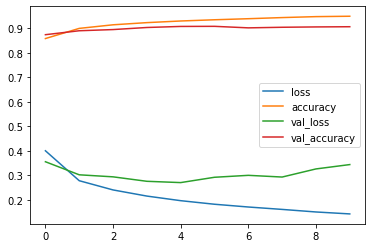

In [24]:
loss.plot()

In [32]:
prediction = model.predict_classes(x_test)

In [33]:
prediction

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
confusion_matrix(y_test,prediction)

array([[828,   0,  29,  21,   4,   1, 109,   0,   8,   0],
       [  2, 973,   2,  15,   5,   0,   2,   0,   1,   0],
       [ 14,   0, 827,   6, 100,   0,  53,   0,   0,   0],
       [ 11,   3,  10, 903,  39,   0,  34,   0,   0,   0],
       [  0,   0,  27,  14, 919,   1,  39,   0,   0,   0],
       [  0,   0,   0,   1,   0, 979,   0,  11,   0,   9],
       [102,   1,  61,  22,  91,   0, 716,   0,   7,   0],
       [  0,   0,   0,   0,   0,  10,   0, 966,   0,  24],
       [  2,   0,   2,   2,   5,   3,   2,   5, 979,   0],
       [  0,   0,   0,   0,   0,   7,   0,  22,   1, 970]], dtype=int64)

In [36]:
print(classification_report(y_test,prediction))

precision    recall  f1-score   support

           0       0.86      0.83      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.86      0.83      0.84      1000
           3       0.92      0.90      0.91      1000
           4       0.79      0.92      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.72      0.73      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

